In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('titanic.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis = 1,inplace = True)

In [7]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [8]:
target = df.Survived
inputs = df.drop('Survived',axis = 1)

In [10]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [11]:
inputs.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [12]:
dummies = pd.get_dummies(df.Sex)
dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [13]:
inputs = pd.concat([inputs,dummies],axis = 1)
inputs.head()

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0
3,1,female,35.0,53.1000,1,0
4,3,male,35.0,8.0500,0,1


In [15]:
inputs.drop('Sex',axis = 1,inplace = True)
inputs.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1


In [16]:
inputs.isnull().sum()

Pclass      0
Age       177
Fare        0
female      0
male        0
dtype: int64

In [18]:
inputs.Age.mean()

29.69911764705882

In [19]:
inputs.fillna(int(inputs.Age.mean()),inplace = True)

In [20]:
inputs['Age'].isnull().sum()

0

In [21]:
inputs.head(10)

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1
5,3,29.0,8.4583,0,1
6,1,54.0,51.8625,0,1
7,3,2.0,21.0750,0,1
8,3,27.0,11.1333,1,0
9,2,14.0,30.0708,1,0


In [22]:
from sklearn.model_selection import train_test_split


In [23]:
X = inputs
y = target

In [24]:
X

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1
...,...,...,...,...,...
886,2,27.0,13.0000,0,1
887,1,19.0,30.0000,1,0
888,3,29.0,23.4500,1,0
889,1,26.0,30.0000,0,1


In [25]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [40]:
len(X_train)

712

In [41]:
len(X_test)

179

In [42]:
from sklearn.naive_bayes import GaussianNB

In [43]:
model = GaussianNB()

In [44]:
model.fit(X_train,y_train)

GaussianNB()

In [45]:
model.score(X_test,y_test)

0.7821229050279329

In [46]:
model.predict(X_test[:10])

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 1], dtype=int64)

In [47]:
model.predict_proba(X_test[:10])

array([[0.98949108, 0.01050892],
       [0.97633976, 0.02366024],
       [0.89906736, 0.10093264],
       [0.04459206, 0.95540794],
       [0.97561239, 0.02438761],
       [0.91770225, 0.08229775],
       [0.87077561, 0.12922439],
       [0.03899907, 0.96100093],
       [0.04752333, 0.95247667],
       [0.00360204, 0.99639796]])

In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
y_predicted = model.predict(X_test)


In [50]:
cm = confusion_matrix(y_test,y_predicted )

In [51]:
import seaborn as sns

<AxesSubplot:>

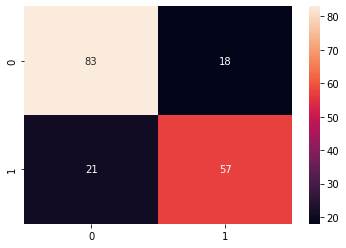

In [52]:
sns.heatmap(cm,annot = True)